https://stackoverflow.com/questions/6697259/interactive-matplotlib-plot-with-two-sliders?rq=3

Source: https://quantpie.co.uk/bsm_formula/bs_summary.php

# 👉 <a id = "top">Table of Contents</a> 👈 

# [1. Functions for Black-Scholes Model Options](#p1)

# [2. Functions for Bachelier Model Options](#p2)

# [3. Functions for Black76 Model Options](#p3)

# [4. Functions for Displaced-Diffusion Model Options](#p4)

# [5. Functions for Greeks for Vanilla Call Options](#p5)

# [6. Functions for Greeks for Vanilla Put Options](#p6)

# [7. Charts for Black-Scholes Model / Black76 Model](#p7)

# [8. Charts for Bachelier Model](#p8)

# [9. Charts for Displaced-Diffusion Model](#p9)

# [10. Charts for Black Scholes Greeks](#p10)

In [1]:
import scipy as sc
from scipy.stats import norm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
import plotly.graph_objects as go
import warnings 

# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

%matplotlib ipympl

# <a id = "p1">1.</a>  <font color = "green"> Functions for Black-Scholes Model Options </font>  [back to table of contents](#top)

In [2]:
def BlackScholesCall(K, r, q, sigma, T):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return S*np.exp(-q*T)*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)

In [3]:
def BlackScholesPut(K, r, q, sigma, T):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*np.exp(-q*T)*norm.cdf(-d1)

In [4]:
# https://www.codearmo.com/python-tutorial/options-trading-black-scholes-model

def BS_CALLDIV(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return S*np.exp(-q*T) * norm.cdf(d1) - K * np.exp(-r*T)* norm.cdf(d2)


In [5]:
# https://www.codearmo.com/python-tutorial/options-trading-black-scholes-model

def BS_PUTDIV(S, K, T, r, q, sigma):
    d1 = (np.log(S/K) + (r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma* np.sqrt(T)
    return K*np.exp(-r*T)*norm.cdf(-d2) - S*np.exp(-q*T)*norm.cdf(-d1)

In [6]:
def BlackScholesDCashCall(K, r, sigma ,T):
    d1 = (np.log(S/K)+(r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(d2)

In [7]:
def BlackScholesDCashPut(K, r, sigma ,T):
    d1 = (np.log(S/K)+(r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    return np.exp(-r*T)*norm.cdf(-d2)


In [8]:
def BlackScholesDAssetCall(K, r, sigma ,T):
    d1 = (np.log(S/K)+(r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    #d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(d1)

In [9]:
def BlackScholesDAssetPut(K, r, sigma ,T):
    d1 = (np.log(S/K)+(r + sigma**2/2)*T) / (sigma*np.sqrt(T))
    #d2 = d1 - sigma*np.sqrt(T)
    return S*norm.cdf(-d1)

# <a id = "p2">2.</a>  <font color = "green"> Functions for Bachelier Model Options </font>  [back to table of contents](#top)

In [10]:
def BachelierCall(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return (S-K)*norm.cdf(c) + sigma*S*np.sqrt(T)*norm.pdf(c)

In [11]:
def BachelierPut(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return (K-S)*norm.cdf(-c) + sigma*S*np.sqrt(T)*norm.pdf(-c) 

In [12]:
def BachelierDCashCall(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return norm.cdf(c)

In [13]:
def BachelierDCashPut(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return norm.cdf(-c)

In [14]:
def BachelierDAssetCall(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return S*norm.cdf(c) + sigma*S*np.sqrt(T)*norm.pdf(c)

In [15]:
def BachelierDAssetPut(K, sigma, T):
    c = (S-K) / (sigma*S*np.sqrt(T))
    return S*norm.cdf(-c) - sigma*S*np.sqrt(T)*norm.pdf(-c)

# <a id = "p3">3.</a>  <font color = "green"> Functions for Black76 Model Options </font>  [back to table of contents](#top)

In [16]:
def Black76Call(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F*norm.cdf(c1) - K*norm.cdf(c2))

In [17]:
def Black76Put(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(K*norm.cdf(-c2) - F*norm.cdf(-c1))

In [18]:
def Black76DCashCall(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*norm.cdf(c2)

In [19]:
def Black76DCashPut(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*norm.cdf(-c2)

In [20]:
def Black76DAssetCall(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    #c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return F*disc*norm.cdf(c1)

In [21]:
def Black76DAssetPut(K, r, sigma, T):
    F = np.exp(r*T)*S
    c1 = (np.log(F/K)+sigma**2/2*T) / (sigma*np.sqrt(T))
    #c2 = c1 - sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return F*disc*norm.cdf(-c1)

# <a id = "p4">4.</a>  <font color = "green"> Functions for Displaced-Diffusion Model Options </font>  [back to table of contents](#top)

In [22]:
def DisplacedDiffusionCall(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F/beta*norm.cdf(c1) - ((1-beta)/beta*F + K)*norm.cdf(c2))

In [23]:
def DisplacedDiffusionPut(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(((1-beta)/beta*F + K)*norm.cdf(-c2) - F/beta*norm.cdf(-c1))

In [24]:
def DisplacedDiffusionDCashCall(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*norm.cdf(c2)

In [25]:
def DisplacedDiffusionDCashPut(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*norm.cdf(-c2)

In [26]:
def DisplacedDiffusionDAssetCall(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F/beta*norm.cdf(c1) - ((1-beta)/beta*F)*norm.cdf(c2))

In [27]:
def DisplacedDiffusionDAssetPut(K, r, sigma, T, beta):
    F = np.exp(r*T)*S
    c1 = (np.log(F/(F+beta*(K-F)))+(beta*sigma)**2/2*T) / (beta*sigma*np.sqrt(T))
    c2 = c1 - beta*sigma*np.sqrt(T)
    disc = np.exp(-r*T)
    return disc*(F/beta*norm.cdf(-c1) - ((1-beta)/beta*F)*norm.cdf(-c2))

# <a id = "p5">5.</a>  <font color = "green"> Functions for Greeks for Vanilla Call Options </font>  [back to table of contents](#top)

In [28]:
def delta_call(K, r, q, sigma, T, S):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    Delta_Call = np.exp(-q*T) * norm.cdf(d1)
    
    return Delta_Call

In [29]:
def gamma_call(K, r, q, sigma, T, S):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    numerator = np.exp(-q*T) * norm.pdf(d1)
    denominator = S * sigma * np.sqrt(T)
    
    Gamma_Call = numerator / denominator
    
    return Gamma_Call

In [30]:
def vega_call(K, r, q, sigma, T, S):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    Vega_Call = S * np.exp(-q*T) * norm.pdf(d1) * np.sqrt(T)
    
    return Vega_Call

In [31]:
def theta_call(K, r, q, sigma, T, S):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    first_term = S * np.exp(-q*T) * q * norm.cdf(d1)
    second_term = K * np.exp(-r*T) * r * norm.cdf(d2)
    third_term = S * np.exp(-q*T) * (sigma /(2*np.sqrt(T))) * norm.pdf(d1)
    
    Theta_Call = first_term - second_term - third_term
    
    return Theta_Call

In [32]:
def rho_call(K, r, q, sigma, T, S):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    Rho_Call = K * np.exp(-r*T) * T * norm.cdf(d2)
    
    return Rho_Call

# <a id = "p6">6.</a>  <font color = "green"> Functions for Greeks for Vanilla Put Options </font>  [back to table of contents](#top)

In [33]:
def delta_put(K, r, q, sigma, T, S):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    Delta_Put = -np.exp(-q*T) * norm.cdf(-d1)
    
    return Delta_Put

In [34]:
def gamma_put(K, r, q, sigma, T, S):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    numerator = np.exp(-q*T) * norm.pdf(d1)
    denominator = S * sigma * np.sqrt(T)
    
    Gamma_Put = numerator / denominator
    
    return Gamma_Put

In [35]:
def vega_put(K, r, q, sigma, T, S):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    Vega_Put = S * np.exp(-q*T) * norm.pdf(d1) * np.sqrt(T)
    
    return Vega_Put

In [36]:
def theta_put(K, r, q, sigma, T, S):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    first_term = -S * np.exp(-q*T) * q * norm.cdf(-d1)
    second_term = K * np.exp(-r*T) * r * norm.cdf(-d2)
    third_term = S * np.exp(-q*T) * (sigma /(2*np.sqrt(T))) * norm.pdf(d1)
    
    Theta_Put = first_term + second_term - third_term
    
    return Theta_Put

In [37]:
def rho_put(K, r, q, sigma, T, S):
    d1 = (np.log(S/K)+(r - q + sigma**2/2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    
    Rho_Put = - K * np.exp(-r*T) * T * norm.cdf(-d2)
    
    return Rho_Put

# Initial Parameters

In [38]:
S = np.arange(0, 200, 1)     # Underlying asset price
K=100                        # Option strike price
r=0.05                       # Risk-free interest rate
q=0                          # Dividend yield rate
sigma=0.2                    # Volatility of the underlying asset
T=1                          # Time to expiration in years
beta=0.5                     # Beta for Displaced-Diffusion Model

# <a id = "p7">7.</a>  <font color = "green"> Charts for Black-Scholes Model / Black76 Model </font>  [back to table of contents](#top)

In [39]:
def BlackScholesPricing(model):

    axis_color = 'skyblue'

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Draw the initial plot
    # The 'line' variable is used for modifying the line later
    [line] = ax.plot(S, model(K, r, q, sigma, T), linewidth=2, color='red')
    ax.set_xlim([0, 200])                               #x-axis limits to be adjusted as needed
    ax.set_ylim([-10, 100])                              #y-axis limits to be adjusted as needed
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option price')
    ax.set_title(f"{model.__name__} Option Price")

    # Add four sliders for tweaking the parameters

    # Define an axes area and draw a slider in it

    rf_slider_ax  = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.10, valinit=r)            #range for risk-free to be adjusted as needed
    
    # Draw another slider
    q_slider_ax = fig.add_axes([0.25, 0.21, 0.65, 0.03], facecolor=axis_color)
    q_slider = Slider(q_slider_ax, 'Dividend', 0.00, 0.10, valinit=q)               #range for dividend rate to be adjusted as needed

    # Draw another slider
    time_slider_ax = fig.add_axes([0.25, 0.17, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)                #range for time to be adjusted as needed

    # Draw another slider
    strike_slider_ax  = fig.add_axes([0.25, 0.13, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)          #range for strike to be adjusted as needed

    # Draw another slider
    sigma_slider_ax = fig.add_axes([0.25, 0.09, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)         #range for sigma to be adjusted as needed

    # Define an action for modifying the line when any slider's value changes
    def sliders_on_changed(val):
        line.set_ydata(model(K=strike_slider.val, q=q_slider.val, sigma=sigma_slider.val, r=rf_slider.val, T=time_slider.val))
        fig.canvas.draw_idle()
    rf_slider.on_changed(sliders_on_changed)
    q_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)

    # Add a button for resetting the parameters
    reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        rf_slider.reset()
        q_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
    reset_button.on_clicked(reset_button_on_clicked)

    # # Add a set of radio buttons for changing color
    # color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
    # color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
    # def color_radios_on_clicked(label):
    #     line.set_color(label)
    #     fig.canvas.draw_idle()
    # color_radios.on_clicked(color_radios_on_clicked)

    plt.show()

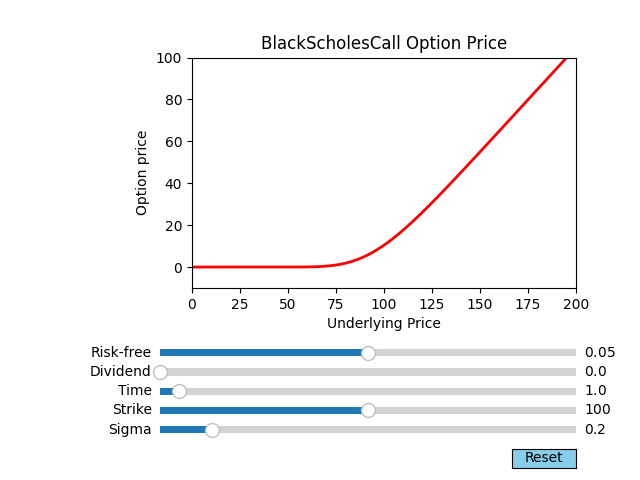

In [40]:
BlackScholesPricing(BlackScholesCall)

# <a id = "p8">8.</a>  <font color = "green"> Charts for Bachelier Model </font>  [back to table of contents](#top)

In [41]:
def BachelierPricing(model):

    axis_color = 'skyblue'

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Draw the initial plot
    # The 'line' variable is used for modifying the line later
    [line] = ax.plot(S, model(K, sigma, T), linewidth=2, color='red')
    ax.set_xlim([0, 200])                               #x-axis limits to be adjusted as needed
    ax.set_ylim([-10, 10])                              #y-axis limits to be adjusted as needed
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option price')
    ax.set_title(f"{model.__name__} Option Price")

    # Add four sliders for tweaking the parameters

    # Define an axes area and draw a slider in it

    # Draw another slider
    time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)                #range for time to be adjusted as needed

    # Draw another slider
    strike_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)          #range for strike to be adjusted as needed

    # Draw another slider
    sigma_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)         #range for sigma to be adjusted as needed

    # Define an action for modifying the line when any slider's value changes
    def sliders_on_changed(val):
        line.set_ydata(model(K=strike_slider.val, sigma=sigma_slider.val, T=time_slider.val))
        fig.canvas.draw_idle()
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)

    # Add a button for resetting the parameters
    reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
    reset_button.on_clicked(reset_button_on_clicked)

    # # Add a set of radio buttons for changing color
    # color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
    # color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
    # def color_radios_on_clicked(label):
    #     line.set_color(label)
    #     fig.canvas.draw_idle()
    # color_radios.on_clicked(color_radios_on_clicked)

    plt.show()

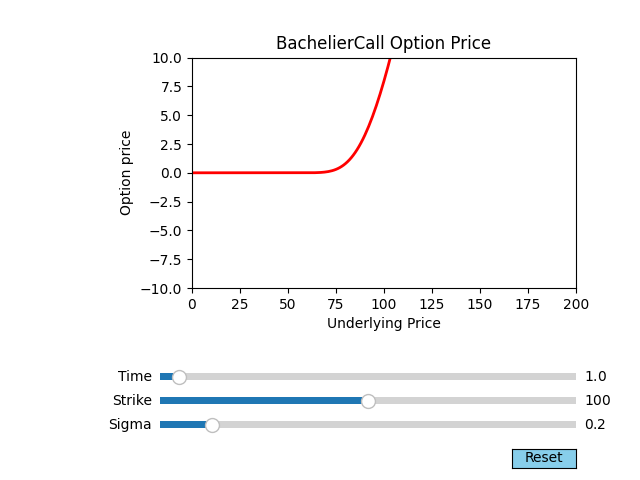

In [42]:
BachelierPricing(BachelierCall)

# <a id = "p9">9.</a>  <font color = "green"> Charts for Displaced-Diffusion Model </font>  [back to table of contents](#top)

In [43]:
def DisplacedDiffusionPricing(model):

    axis_color = 'skyblue'

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(left=0.30, bottom=0.40)

    # Draw the initial plot
    # The 'line' variable is used for modifying the line later
    [line] = ax.plot(S, model(K, r, sigma, T, beta), linewidth=2, color='red')
    ax.set_xlim([0, 200])                               #x-axis limits to be adjusted as needed
    ax.set_ylim([-2, 2])                              #y-axis limits to be adjusted as needed
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel('Option price')
    ax.set_title(f"{model.__name__} Option Price")

    # Add four sliders for tweaking the parameters

    # Define an axes area and draw a slider in it

    rf_slider_ax  = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.10, valinit=r)            #range for risk-free to be adjusted as needed

    # Draw another slider
    time_slider_ax = fig.add_axes([0.25, 0.20, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)                #range for time to be adjusted as needed

    # Draw another slider
    strike_slider_ax  = fig.add_axes([0.25, 0.15, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)          #range for strike to be adjusted as needed

    # Draw another slider
    sigma_slider_ax = fig.add_axes([0.25, 0.1, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)         #range for sigma to be adjusted as needed
    
    # Draw another slider
    beta_slider_ax = fig.add_axes([0.25, 0.05, 0.65, 0.03], facecolor=axis_color)
    beta_slider = Slider(beta_slider_ax, 'Beta', 0.1, 0.9, valinit=beta)             #range for beta to be adjusted as needed

    # Define an action for modifying the line when any slider's value changes
    def sliders_on_changed(val):
        line.set_ydata(model(K=strike_slider.val, sigma=sigma_slider.val, r=rf_slider.val, T=time_slider.val, beta=beta_slider.val))
        fig.canvas.draw_idle()
    rf_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    beta_slider.on_changed(sliders_on_changed)

    # Add a button for resetting the parameters
    reset_button_ax = fig.add_axes([0.8, 0.01, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        rf_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
        beta_slider.reset()
    reset_button.on_clicked(reset_button_on_clicked)

    # # Add a set of radio buttons for changing color
    # color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
    # color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
    # def color_radios_on_clicked(label):
    #     line.set_color(label)
    #     fig.canvas.draw_idle()
    # color_radios.on_clicked(color_radios_on_clicked)

    plt.show()

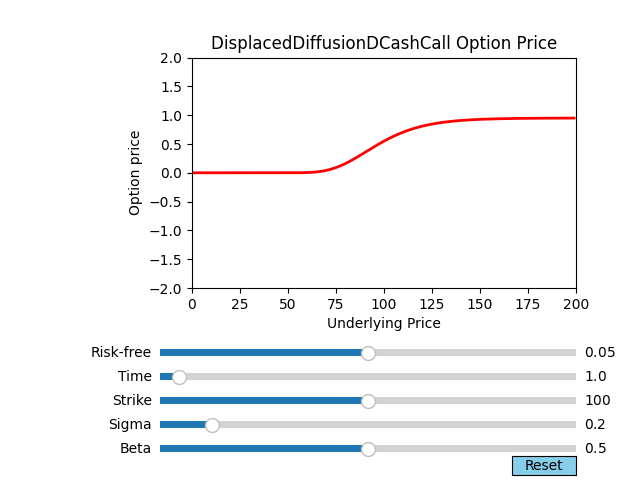

In [44]:
DisplacedDiffusionPricing(DisplacedDiffusionDCashCall)

# <a id = "p10">10.</a>  <font color = "green"> Charts for Black Scholes Greeks </font>  [back to table of contents](#top)

This only works on Black Scholes Model with d1 and d2

In [45]:
def GreekSensitivity(model,greek):
    
    S = np.arange(50, 150, 1)     # Underlying asset price
    K=100                        # Option strike price
    r=0.03                       # Risk-free interest rate
    q=0                          # Dividend yield rate
    sigma=0.2                    # Volatility of the underlying asset
    T=1                          # Time to expiration in years

    axis_color = 'skyblue'

    fig = plt.figure()
    ax = fig.add_subplot(111)

    # Adjust the subplots region to leave some space for the sliders and buttons
    fig.subplots_adjust(left=0.30, bottom=0.40)
    
    # Define the range for S0
    S_range = np.linspace(50, 150, 100)
    greeks = [greek(K, r, q, sigma, T, S) for S in S_range]

    # Draw the initial plot
    line, = ax.plot(S_range, greeks, linewidth=2, color='red')
    ax.set_xlim([50, 150])                               #x-axis limits to be adjusted as needed
    ax.set_ylim([min(min(greeks) * 0.9,min(greeks) * 1.1), max(greeks) * 1.1])                                   #y-axis limits to be adjusted as needed
    ax.set_xlabel('Underlying Price')
    ax.set_ylabel(f"{greek.__name__}")
    ax.set_title(f"Change in {greek.__name__} for {model.__name__}")

    # Add five sliders for tweaking the parameters

    # Define an axes area and draw a slider in it

    rf_slider_ax  = fig.add_axes([0.25, 0.25, 0.65, 0.03], facecolor=axis_color)
    rf_slider = Slider(rf_slider_ax, 'Risk-free', 0.00, 0.10, valinit=r)            #range for risk-free to be adjusted as needed
    
    q_slider_ax  = fig.add_axes([0.25, 0.21, 0.65, 0.03], facecolor=axis_color)
    q_slider = Slider(q_slider_ax, 'Dividend', 0.00, 0.10, valinit=q)              #range for Dividend yield to be adjusted as needed

    time_slider_ax = fig.add_axes([0.25, 0.17, 0.65, 0.03], facecolor=axis_color)
    time_slider = Slider(time_slider_ax, 'Time', 0.1, 20, valinit=T)                #range for time to be adjusted as needed

    strike_slider_ax  = fig.add_axes([0.25, 0.13, 0.65, 0.03], facecolor=axis_color)
    strike_slider = Slider(strike_slider_ax, 'Strike', 50, 150, valinit=K)          #range for strike to be adjusted as needed

    sigma_slider_ax = fig.add_axes([0.25, 0.09, 0.65, 0.03], facecolor=axis_color)
    sigma_slider = Slider(sigma_slider_ax, 'Sigma', 0.1, 0.9, valinit=sigma)         #range for sigma to be adjusted as needed

    # Define an action for modifying the line when any slider's value changes
    def sliders_on_changed(val):
        #S_current = S_slider.val
        
        rf_current = rf_slider.val
        dividend_yield_current = q_slider.val
        sigma_current = sigma_slider.val
        strike_current = strike_slider.val
        T_current = time_slider.val

        greeks = [greek(strike_current, rf_current, dividend_yield_current, sigma_current, T_current, S) for S in S_range]
        line.set_ydata(greeks)
        ax.set_ylim([min(min(greeks) * 0.9,min(greeks) * 1.1), max(greeks) * 1.1])  # Adjust y-axis based on new data
        fig.canvas.draw_idle()

    #S_slider.on_changed(sliders_on_changed)
    rf_slider.on_changed(sliders_on_changed)
    q_slider.on_changed(sliders_on_changed)
    sigma_slider.on_changed(sliders_on_changed)
    strike_slider.on_changed(sliders_on_changed)
    time_slider.on_changed(sliders_on_changed)

    # Add a button for resetting the parameters
    reset_button_ax = fig.add_axes([0.8, 0.025, 0.1, 0.04])
    reset_button = Button(reset_button_ax, 'Reset', color=axis_color, hovercolor='0.975')
    def reset_button_on_clicked(mouse_event):
        rf_slider.reset()
        q_slider.reset()
        time_slider.reset()
        strike_slider.reset()
        sigma_slider.reset()
    reset_button.on_clicked(reset_button_on_clicked)

    # # Add a set of radio buttons for changing color
    # color_radios_ax = fig.add_axes([0.025, 0.5, 0.15, 0.15], facecolor=axis_color)
    # color_radios = RadioButtons(color_radios_ax, ('red', 'blue', 'green'), active=0)
    # def color_radios_on_clicked(label):
    #     line.set_color(label)
    #     fig.canvas.draw_idle()
    # color_radios.on_clicked(color_radios_on_clicked)

    plt.show()

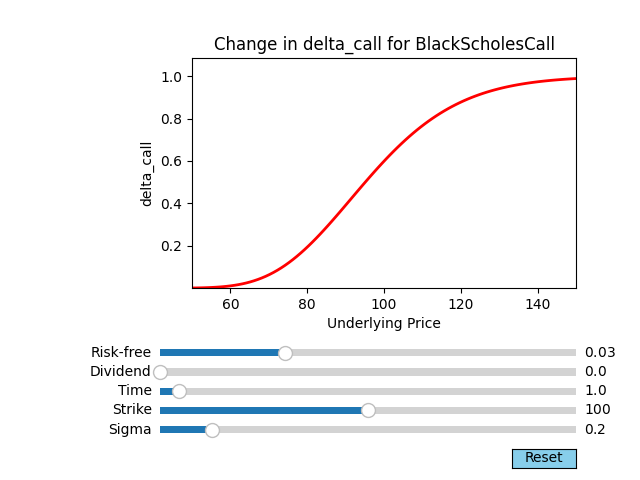

In [46]:
GreekSensitivity(model=BlackScholesCall,
                 greek=delta_call)

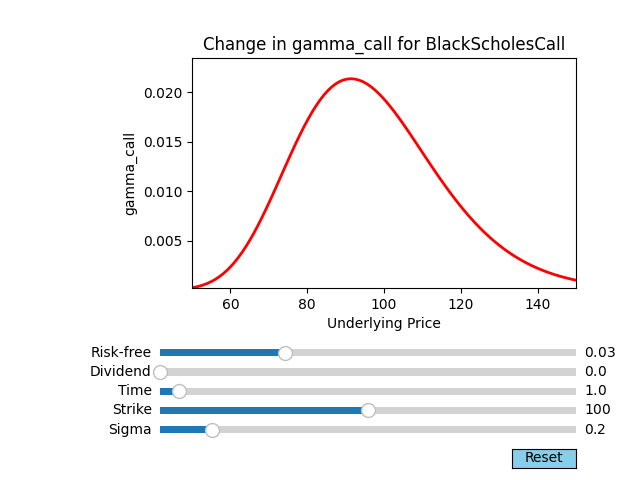

In [47]:
GreekSensitivity(model=BlackScholesCall,
                 greek=gamma_call)

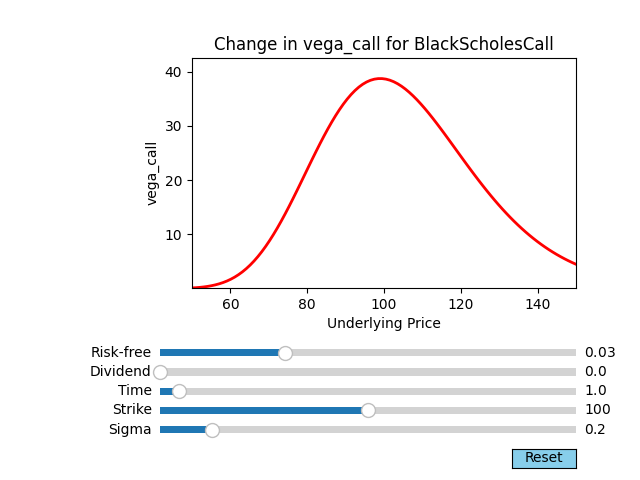

In [48]:
GreekSensitivity(model=BlackScholesCall,
                 greek=vega_call)

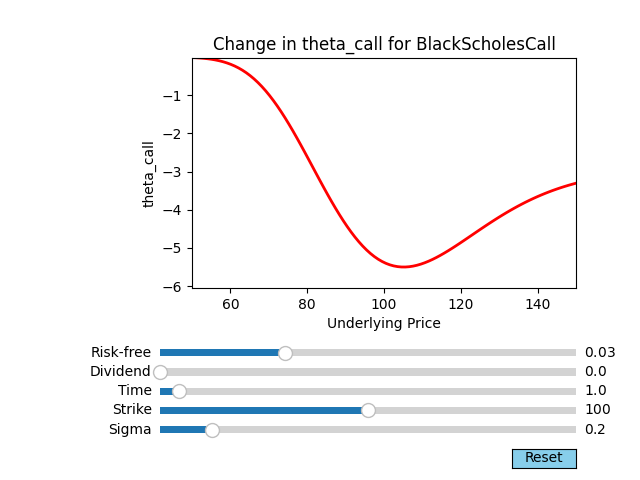

In [49]:
GreekSensitivity(model=BlackScholesCall,
                 greek=theta_call)

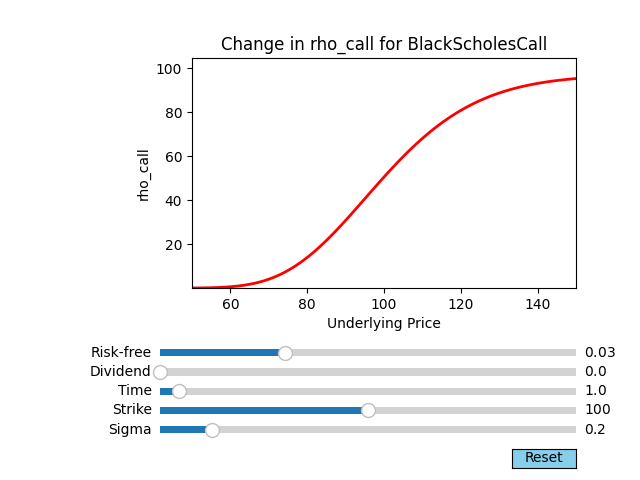

In [50]:
GreekSensitivity(model=BlackScholesCall,
                 greek=rho_call)

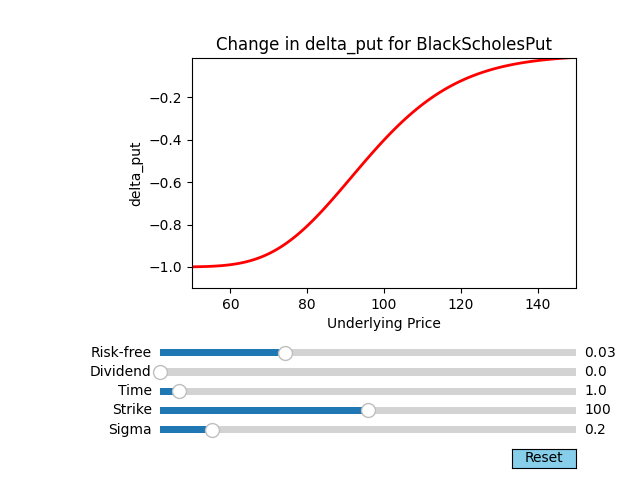

In [51]:
GreekSensitivity(model=BlackScholesPut,
                 greek=delta_put)

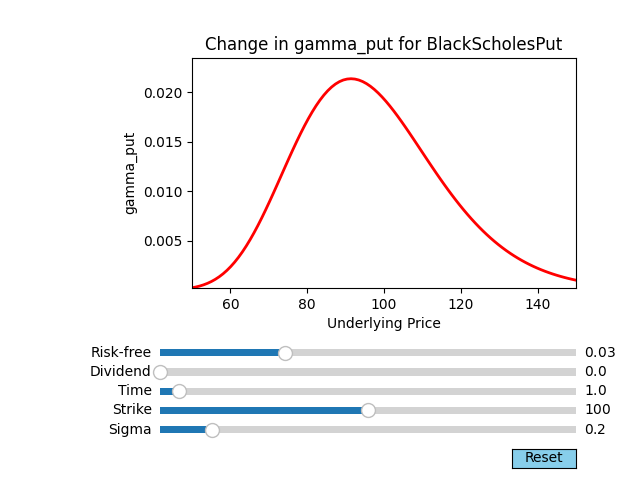

In [52]:
GreekSensitivity(model=BlackScholesPut,
                 greek=gamma_put)

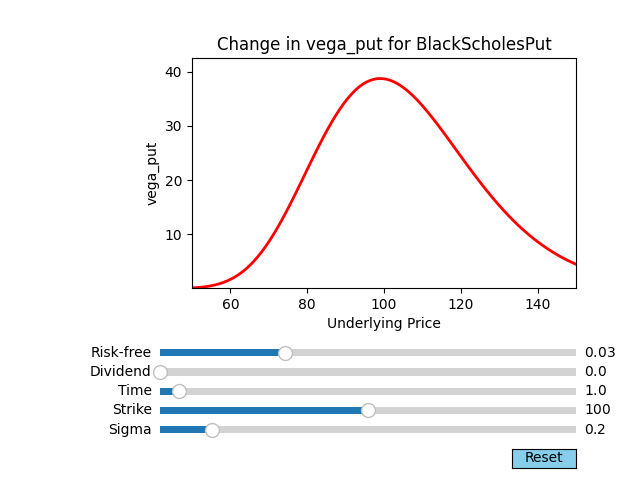

In [53]:
GreekSensitivity(model=BlackScholesPut,
                 greek=vega_put)

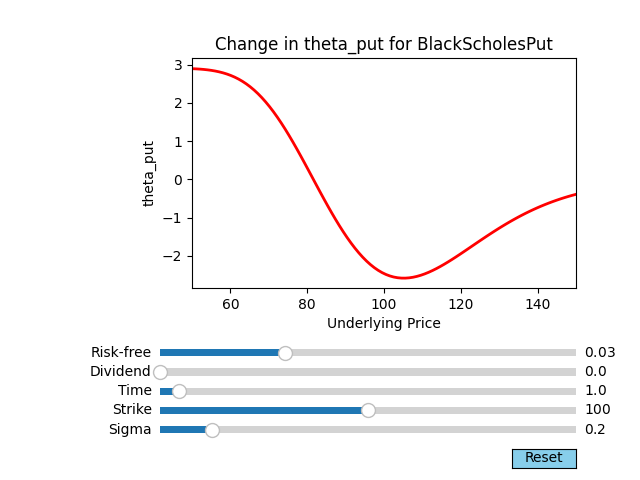

In [54]:
GreekSensitivity(model=BlackScholesPut,
                 greek=theta_put)

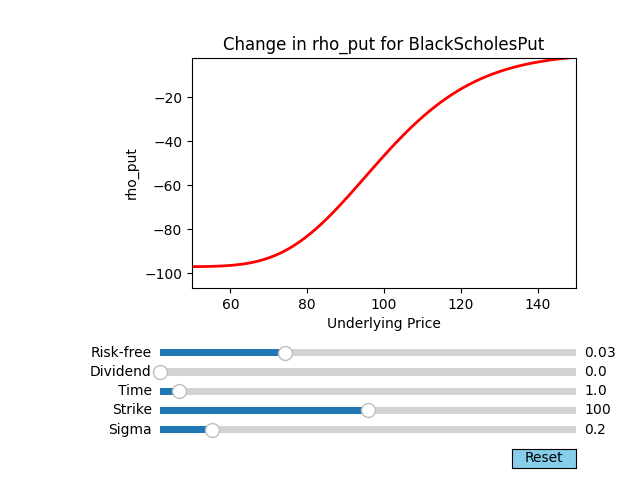

In [55]:
GreekSensitivity(model=BlackScholesPut,
                 greek=rho_put)